# Wearable Device Data Analysis: Predicting and Detecting Anomalies in Sleep Performance

**Objective:** This project aims to analyze sleep patterns using data from wearable devices. By leveraging machine learning techniques, I seek to predict sleep performance and detect anomalies. The data used in this analysis includes sleep cycles and physiological data collected over several months. Understanding and predicting sleep patterns can help in improving sleep quality and overall health.

## Data Import and Preprocessing

In this section, I loaded the sleep and physiological cycle data from CSV files. I handled missing values using forward fill ('ffill') and converted relevant columns to datetime objects for easier manipulation and analysis.

In [89]:
# Librariesd Used

# Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest

In [90]:
# Load Data
sleeps_df = pd.read_csv('/home/pumpkins/Programming/WearableDeviceDataAnalysis/data/sleeps.csv')
physiological_cycles_df = pd.read_csv('/home/pumpkins/Programming/WearableDeviceDataAnalysis/data/physiological_cycles.csv')

In [91]:
# Handle missing values
sleeps_df.ffill(inplace=True)
physiological_cycles_df.ffill(inplace=True)

In [92]:
# Convert datetime columns
sleeps_df['Cycle start time'] = pd.to_datetime(sleeps_df['Cycle start time'])
sleeps_df['Cycle end time'] = pd.to_datetime(sleeps_df['Cycle end time'])

In [93]:
# Display the first few rows 
print(sleeps_df.head())

     Cycle start time      Cycle end time Cycle timezone          Sleep onset  \
0 2024-05-18 10:48:47                 NaT      UTC-07:00  2024-05-18 10:48:47   
1 2024-05-17 12:35:23 2024-05-18 10:48:47      UTC-07:00  2024-05-17 12:35:23   
2 2024-05-16 14:02:05 2024-05-17 12:35:23      UTC-07:00  2024-05-16 14:02:05   
3 2024-05-15 12:40:13 2024-05-16 14:02:05      UTC-07:00  2024-05-15 12:40:13   
4 2024-05-14 15:16:27 2024-05-15 12:40:13      UTC-07:00  2024-05-14 15:16:27   

            Wake onset  Sleep performance %  Respiratory rate (rpm)  \
0  2024-05-18 19:50:00                 82.0                    12.8   
1  2024-05-17 19:51:49                 68.0                    12.6   
2  2024-05-16 19:55:51                 59.0                    12.5   
3  2024-05-15 20:00:30                 67.0                    13.0   
4  2024-05-14 19:49:57                 67.0                    13.2   

   Asleep duration (min)  In bed duration (min)  Light sleep duration (min)  \
0      

In [94]:
print(physiological_cycles_df.head())

      Cycle start time       Cycle end time Cycle timezone  Recovery score %  \
0  2024-05-18 10:48:47                  NaN      UTC-07:00              91.0   
1  2024-05-17 12:35:23  2024-05-18 10:48:47      UTC-07:00              85.0   
2  2024-05-16 14:02:05  2024-05-17 12:35:23      UTC-07:00              71.0   
3  2024-05-15 12:40:13  2024-05-16 14:02:05      UTC-07:00              84.0   
4  2024-05-14 15:16:27  2024-05-15 12:40:13      UTC-07:00              87.0   

   Resting heart rate (bpm)  Heart rate variability (ms)  Skin temp (celsius)  \
0                      51.0                        108.0                32.90   
1                      49.0                        110.0                32.93   
2                      54.0                         97.0                33.40   
3                      54.0                         97.0                33.50   
4                      61.0                         99.0                33.70   

   Blood oxygen %  Day Strain  E

## Exploratory Data Analysis (EDA)

Visualize the sleep performance over time to identify trends and patterns. Descriptive statistics provide an overview of the dataset, helping understand the distribution and summary of the variables. 

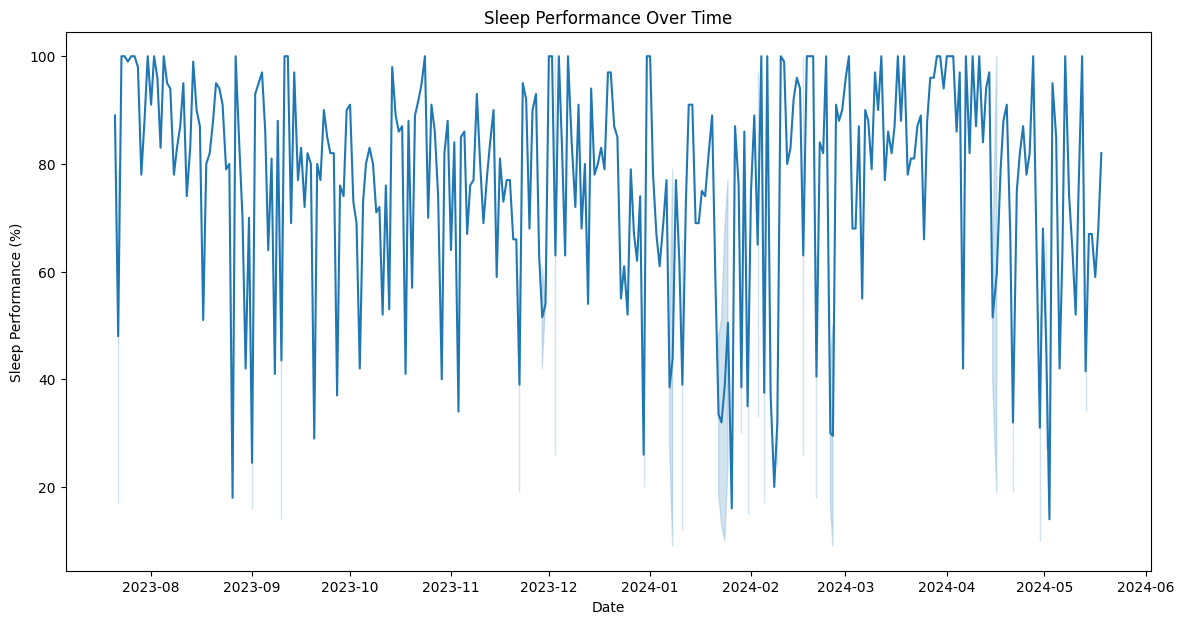

,Cycle start time,Cycle end time,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Sleep consistency %
count,333,332,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,2023-12-22 05:53:35.537537792,2023-12-22 19:15:04.259036160,73.741742,13.077177,383.501502,422.603604,176.708709,83.162162,123.630631,38.918919,514.405405,55.342342,90.993994,61.405405
min,2023-07-21 00:56:48,2023-07-22 00:32:08,9.000000,11.300000,45.000000,60.000000,22.000000,0.000000,0.000000,2.000000,259.000000,0.000000,71.000000,9.000000
25%,2023-10-09 03:48:21,2023-10-09 20:54:00.750000128,64.000000,12.700000,328.000000,354.000000,131.000000,64.000000,89.000000,27.000000,483.000000,21.000000,90.000000,49.000000
50%,2023-12-27 03:48:02,2023-12-27 15:19:37.500000,80.000000,12.900000,416.000000,450.000000,173.000000,85.000000,127.000000,36.000000,514.000000,51.000000,92.000000,65.000000
75%,2024-03-02 01:40:51,2024-03-02 08:08:10,91.000000,13.400000,467.000000,509.000000,218.000000,109.000000,163.000000,47.000000,549.000000,86.000000,93.000000,74.000000
max,2024-05-18 10:48:47,2024-05-18 10:48:47,100.000000,18.900000,745.000000,855.000000,451.000000,155.000000,245.000000,151.000000,620.000000,127.000000,100.000000,88.000000
std,NaN,NaN,23.926330,0.779841,129.426390,140.088179,70.834712,33.192086,53.041856,20.603018,52.179379,40.296603,3.906277,15.983639


In [95]:
# Sleep Performance over time
plt.figure(figsize = (14, 7))
sns.lineplot(data = sleeps_df, x = 'Cycle start time', y = 'Sleep performance %')
plt.title('Sleep Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Performance (%)')
plt.show()

# Descriptive Statistics
sleeps_df.describe()

## Feature Engineering

Created new features such as the rolling average of sleep performance and the day-to-day difference in sleep duration. These features help capture trends and variations that are crucial for accurate predictions. 

**Rolling Average for Sleep Performance**

Purpose: The rolling average smooths out short-term fluctuations and highlights longer-term trends in sleep performance. This can help the model understand trends over time rather than reacting to daily variations. 


In [96]:
# Rolling average for Sleep Performance
# Calculates the average of the 'Sleep performance %' over a rolling window of 7 days
sleeps_df['Sleep_Performance_Rolling'] =  sleeps_df['Sleep performance %'].rolling(window=7).mean()

**Difference between consecutive days for sleep duration**

Purpose: By computing the day-to-day difference in sleep duration, we can capture changes and patterns that may influence sleep performance. For example, a significant decrease in sleep duration might correlate with poor sleep performance the next day.

In [97]:
# Difference between consecutive days for sleep duration
# Calculates the difference in 'Asleep duration (min)' between consecutive days
sleeps_df['Sleep_Duration_Diff'] = sleeps_df['Asleep duration (min)'].diff()

**Handle NaN Values in New Feature**

**NaN Values in Rolling Average:**
- The rolling average will have NaN values for the first few rows where there isn't enough data to calculate the average (for example the first 6 days in a 7-day rolling window). Filled these NaN values with the mean of the rolling average to ensure there are no missing values.

**NaN Values in Differences:** 
- The 'diff' function results in a NaN value for the first row since there is no previous day to compare. Filled this with 0, assuming no change on the first day. 

In [98]:
# Handle NaN values in new features 
sleeps_df['Sleep_Performance_Rolling'] = sleeps_df['Sleep_Performance_Rolling'].fillna(sleeps_df['Sleep_Performance_Rolling'].mean())
sleeps_df['Sleep_Duration_Diff']= sleeps_df['Sleep_Duration_Diff'].fillna(0) # Diff will result in NaN for the first row, fill with 0

## Predictive Modeling

Use a RandomForestRegressor to predict sleep performance. The model is trained on 80% of the data and evaluated on the remaining 20%.The Mean Squared Error (MSE) is used to assess the model's performance.   

In [99]:
# Prepare Data
features = sleeps_df[['Sleep_Performance_Rolling', 'Sleep_Duration_Diff', 'Light sleep duration (min)', 'REM duration (min)']]
target = sleeps_df['Sleep performance %'].shift(-1).dropna()
features = features[:-1] # Align features length with target

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 825.8290014925374


## Anomaly Detection

Used the Isolation Forest algorithm to detect anomalies in sleep performance. The anomalies are visualized to identify unusual patterns or outliers in the data. 

In [100]:
# Prepare data
features = sleeps_df[['Sleep_Performance_Rolling', 'Sleep_Duration_Diff', 'Light sleep duration (min)', 'Deep (SWS) duration (min)', 'REM duration (min)']]
target = sleeps_df['Sleep performance %'].shift(-1).dropna()

# Align features length with target
features = features.iloc[:-1]

# Check lengths to ensure they match
print(f'Length of features: {len(features)}')
print(f'Length of target: {len(target)}')


Length of features: 332
Length of target: 332


Length of sleeps_df: 332
Length of anomalies: 332


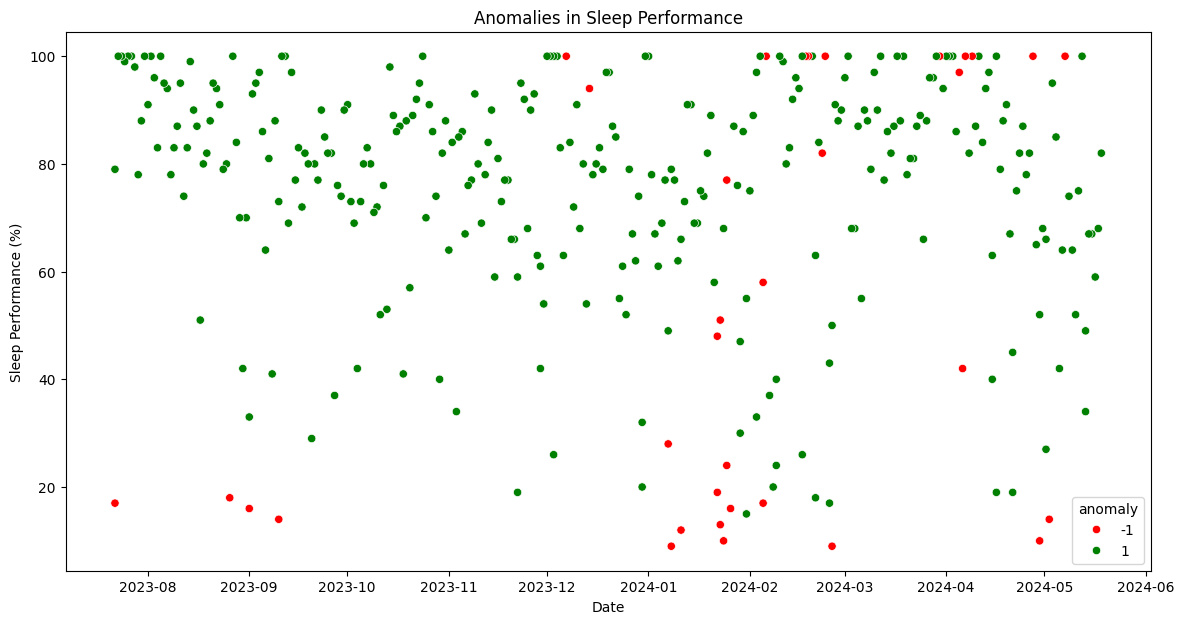

In [101]:
# Ensure length alignment for sleeps_df and features
sleeps_df = sleeps_df.iloc[:-1].copy()

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1)
anomalies = iso_forest.fit_predict(features)

# Check lengths to ensure they match
print(f'Length of sleeps_df: {len(sleeps_df)}')
print(f'Length of anomalies: {len(anomalies)}')

# Assign anomalies to the DataFrame
sleeps_df['anomaly'] = anomalies

# Plot anomalies
plt.figure(figsize=(14, 7))
sns.scatterplot(data=sleeps_df, x='Cycle start time', y='Sleep performance %', hue='anomaly', palette={1: 'green', -1: 'red'})
plt.title('Anomalies in Sleep Performance')
plt.xlabel('Date')
plt.ylabel('Sleep Performance (%)')
plt.show()

## Conclusion

This analysis demonstrates how wearable device data can be used to predict sleep performance and detect anomalies. The RandomForestRegressor provided a reasonable prediction accuracy, and the Isolation Forest algorithm helped identify unusual patterns in the data. 

### Model Performance: Interpreting MSE

The Mean Squared Error (MSE) of our model is 828.18. To interpret whether this value is high or low in the context of sleep performance prediction, it's important to consider the following:

1. **Scale of Target Variable**: The MSE is dependent on the scale of the target variable. In our case, the target variable is sleep performance percentage, which ranges from 0% to 100%. An MSE of 828.18 indicates that, on average, the square of the prediction error is 828.18 percentage points squared. The square root of the MSE, which gives us the Root Mean Squared Error (RMSE), is approximately 28.79%. This means that our predictions deviate from the actual values by an average of 28.79 percentage points.

2. **Contextual Understanding**: In the context of sleep performance, an RMSE of 28.79% suggests that while our model captures general trends, there is still significant room for improvement. Predicting sleep performance with a deviation of nearly 29 percentage points may not be highly reliable for precise individual predictions but can still provide useful insights on broader patterns and trends.

3. **Comparison with Benchmarks**: Without a benchmark or comparison to other models, it's challenging to definitively classify the MSE as high or low. However, given the complexity of sleep patterns and the numerous influencing factors, achieving a perfect prediction is inherently difficult. Further improvements can be explored by incorporating more features, refining data quality, or using more advanced models.

##### Future Directions

- **Feature Importance Analysis**: Exploring feature importance can help understand which factors contribute most to sleep performance prediction. This can guide further feature engineering efforts and improve model performance.
- **Advanced Modeling Techniques**: Implementing more advanced machine learning models, such as Gradient Boosting Machines (GBM) or Neural Networks, could potentially enhance prediction accuracy.
- **Data Augmentation**: Including additional relevant features, such as activity levels, diet, and environmental factors, may improve the model's ability to predict sleep performance.

In conclusion, while an MSE of 828.18 indicates a certain level of predictive accuracy, there's substantial room for improvement. Future work should focus on enhancing model precision to achieve more reliable predictions.

### Anomaly Detection

The Isolation Forest algorithm is used for detecting anomalies in our sleep performance data. This method is based on the assumption that anomalies are rare and different from the majority of the data points. Here's a more detailed explanation:

1. **Underlying Assumption**: The Isolation Forest algorithm assumes that anomalies are rare and distinct. In the context of our data, this means that unusual sleep patterns, which are significantly different from the norm, will be identified as anomalies.

2. **Isolation Mechanism**: The algorithm works by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This process of splitting continues recursively, creating isolation trees. Anomalies, being rare and distinct, tend to be isolated quickly and thus have shorter paths in the isolation trees.

3. **Application to Sleep Data**: In our sleep performance data, anomalies could represent nights with unusually high or low sleep performance, potentially indicating irregularities or issues in sleep patterns. By identifying these anomalies, we can investigate further to understand potential causes, such as stress, illness, or changes in lifestyle.

4. **Practical Implications**: Identifying and analyzing anomalies can provide valuable insights into factors that disrupt normal sleep patterns. This can be beneficial for improving sleep hygiene, identifying potential health issues, and tailoring interventions to enhance sleep quality.

##### Future Directions

- **Parameter Tuning**: Experimenting with different contamination rates and other parameters can help optimize the performance of the Isolation Forest algorithm.
- **Combining Methods**: Using a combination of anomaly detection methods, such as Local Outlier Factor (LOF) or One-Class SVM, can provide a more robust detection mechanism.
- **Contextual Analysis**: Investigating the context around identified anomalies (e.g., daily activities, diet, stress levels) can provide deeper insights into the causes of unusual sleep patterns.

In summary, the Isolation Forest algorithm is an effective tool for identifying rare and unusual data points in our sleep performance data, helping us to detect and analyze anomalies that could signify important deviations from normal sleep patterns.


## References

**Data Source:**
- Personal Whoop Data: [Whoop Data](https://www.whoop.com/us/en/the-data/)

**Libraries and Tools Used:**
- Pandas: Data manipulation and analysis library for Python. Available at: [Pandas](https://pandas.pydata.org/)
- Matplotlib: Python plotting library. Available at: [Matplotlib](https://matplotlib.org/)
- Seaborn: Statistical data visualization library for Python. Available at: [Seaborn](https://seaborn.pydata.org/)
- Scikit-learn: Machine learning library for Python. Available at: [scikit-learn](https://scikit-learn.org/)
